<a href="https://colab.research.google.com/github/Shadenalturki/Fashion_MNIST/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from tensorflow.keras.datasets import fashion_mnist


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:


print("Missing values in train_images:", np.isnan(train_images).any())
print("Missing values in test_images:", np.isnan(test_images).any())

Missing values in train_images: False
Missing values in test_images: False


In [14]:
print("Missing values in train_labels:", np.isnan(train_labels).any())
print("Missing values in test_labels:", np.isnan(test_labels).any())

Missing values in train_labels: False
Missing values in test_labels: False


In [15]:
# Normalize from from 0 to 255 to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
# Convert 2D images (28x28 pixels) into 1D vectors (784 values)
train_flat = train_images.reshape(len(train_images), -1)  # shape: (60000, 784)
test_flat = test_images.reshape(len(test_images), -1)    # shape: (10000, 784)

In [17]:
# Check the Result
print("Shape before flattening:", train_images.shape)  # (60000, 28, 28)
print("Shape after flattening:", train_flat.shape)     # (60000, 784)

print("Pixel range:", train_images.min(), "to", train_images.max())

Shape before flattening: (60000, 28, 28)
Shape after flattening: (60000, 784)
Pixel range: 0.0 to 0.00392156862745098


In [18]:
import numpy as np

# نحسب المتوسط والانحراف المعياري لكل بكسل عبر جميع صور التدريب
pixel_mean = np.mean(train_images, axis=0)
pixel_std = np.std(train_images, axis=0)

print("Mean pixel shape:", pixel_mean.shape)  # (28, 28)
print("Std pixel shape:", pixel_std.shape)

Mean pixel shape: (28, 28)
Std pixel shape: (28, 28)


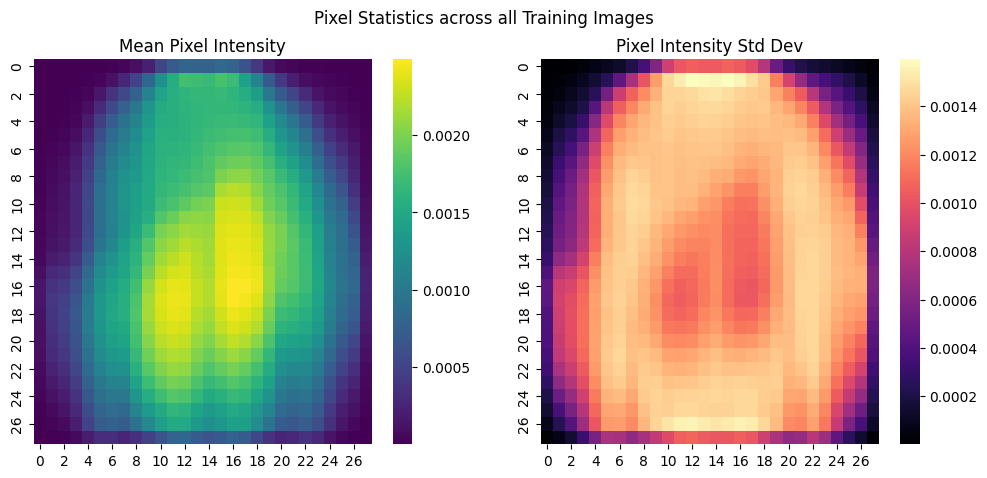

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(pixel_mean, ax=axs[0], cmap='viridis')
axs[0].set_title("Mean Pixel Intensity")


sns.heatmap(pixel_std, ax=axs[1], cmap='magma')
axs[1].set_title("Pixel Intensity Std Dev")

plt.suptitle("Pixel Statistics across all Training Images")
plt.show()



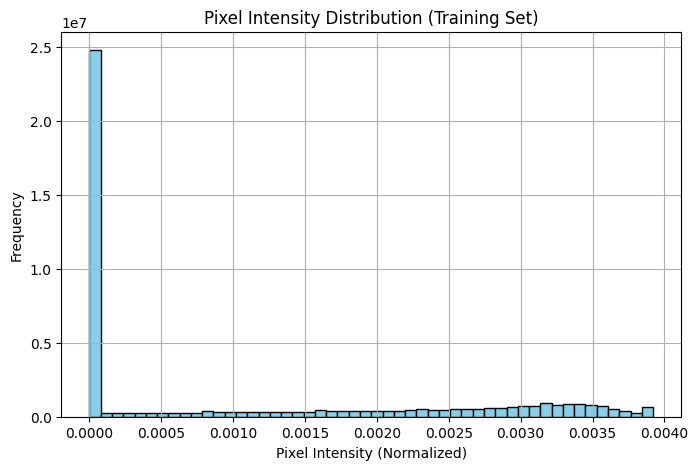

In [20]:
import matplotlib.pyplot as plt

all_pixels = train_images.flatten()

plt.figure(figsize=(8, 5))
plt.hist(all_pixels, bins=50, color='skyblue', edgecolor='black')
plt.title("Pixel Intensity Distribution (Training Set)")
plt.xlabel("Pixel Intensity (Normalized)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

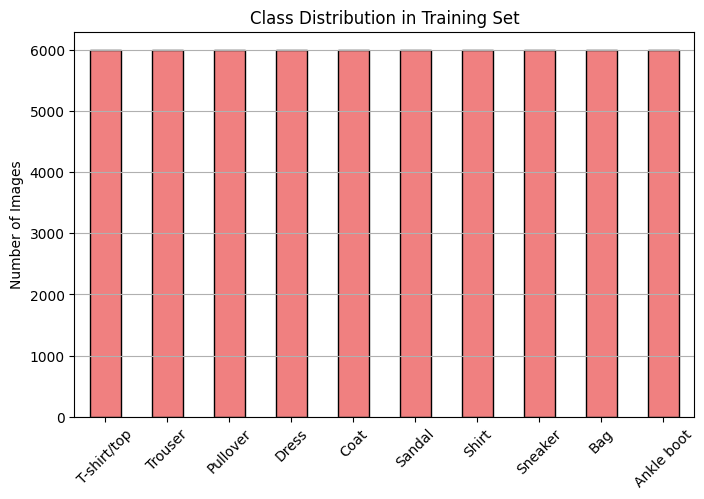

In [21]:
# Class names mapping
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a DataFrame for counts
label_counts = pd.Series(train_labels).value_counts().sort_index()
label_counts.index = class_names

# Plot
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

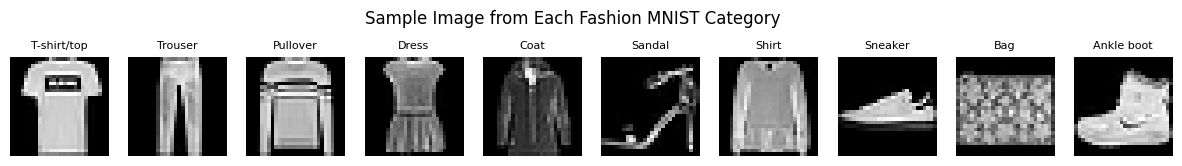

In [10]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 10, figsize=(15, 2))

for label in range(10):
    idx = np.where(train_labels == label)[0][0]
    axes[label].imshow(train_images[idx], cmap='gray')
    axes[label].set_title(class_names[label], fontsize=8)
    axes[label].axis('off')

plt.suptitle("Sample Image from Each Fashion MNIST Category")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Flattened data assumed from earlier step
# train_flat shape: (60000, 784)

# Apply PCA without specifying n_components (keep all to analyze variance)
pca = PCA()
pca.fit(train_flat)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

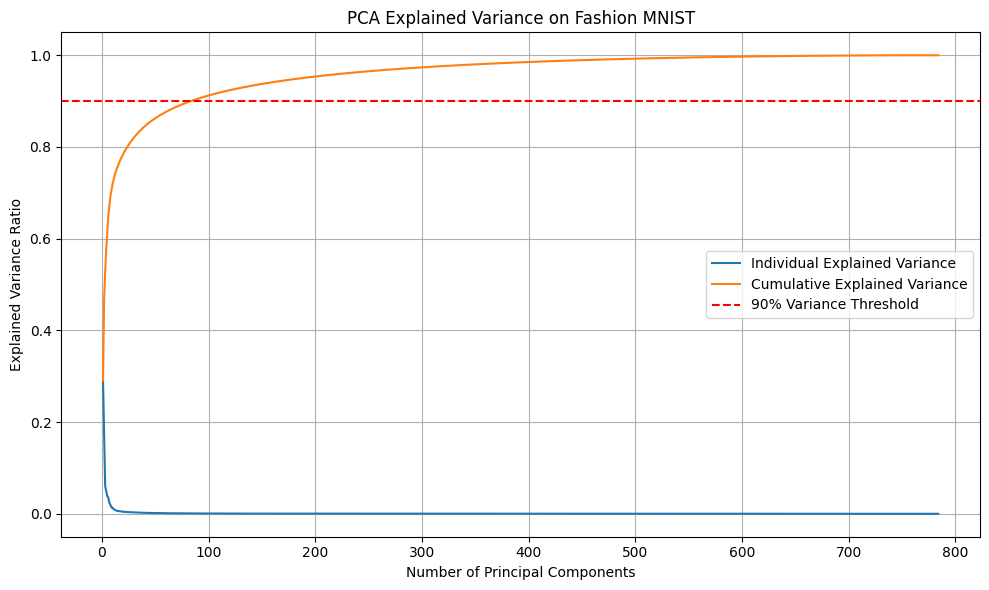

In [ ]:
plt.figure(figsize=(10, 6))

# Explained variance per component
plt.plot(range(1, len(explained_variance) + 1), explained_variance, label="Individual Explained Variance")

# Cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, label="Cumulative Explained Variance")

plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance Threshold")
plt.title("PCA Explained Variance on Fashion MNIST")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

def reconstruct_and_evaluate(train_flat, n_components_list):
    mse_results = {}
    reconstructions = {}

    for n in n_components_list:
        # Fit PCA and transform
        pca = PCA(n_components=n)
        train_reduced = pca.fit_transform(train_flat)

        # Reconstruct images
        train_reconstructed = pca.inverse_transform(train_reduced)

        # Calculate MSE between original and reconstructed
        mse = mean_squared_error(train_flat, train_reconstructed)
        mse_results[n] = mse
        reconstructions[n] = train_reconstructed

        print(f"{n} components → MSE: {mse:.5f}")

    return mse_results, reconstructions

n_components_list = [10, 50, 100]
mse_results, reconstructions = reconstruct_and_evaluate(train_flat, n_components_list)



10 components → MSE: 0.02437
50 components → MSE: 0.01195


In [ ]:
import matplotlib.pyplot as plt

def show_reconstruction_comparison(originals, reconstructions, indices=[0, 1, 2]):
    plt.figure(figsize=(12, len(indices) * 2))

    for row, idx in enumerate(indices):
        # Original
        plt.subplot(len(indices), len(reconstructions) + 1, row * (len(reconstructions) + 1) + 1)
        plt.imshow(originals[idx].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructions
        for col, n in enumerate(sorted(reconstructions.keys())):
            plt.subplot(len(indices), len(reconstructions) + 1, row * (len(reconstructions) + 1) + 2 + col)
            plt.imshow(reconstructions[n][idx].reshape(28, 28), cmap='gray')
            plt.title(f"{n} comps")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

show_reconstruction_comparison(train_flat, reconstructions)


In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(mse_results.keys(), mse_results.values(), marker='o')
plt.title("Reconstruction Error vs. PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("MSE")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def show_reconstruction_comparison(originals, reconstructions, indices=[0, 1, 2, 3, 4]):
    num_examples = len(indices)
    num_versions = len(reconstructions) + 1  # +1 for original

    plt.figure(figsize=(num_versions * 2.5, num_examples * 2.5))

    for row, idx in enumerate(indices):
        # Original image
        plt.subplot(num_examples, num_versions, row * num_versions + 1)
        plt.imshow(originals[idx].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed versions
        for col, n in enumerate(sorted(reconstructions.keys())):
            plt.subplot(num_examples, num_versions, row * num_versions + 2 + col)
            plt.imshow(reconstructions[n][idx].reshape(28, 28), cmap='gray')
            plt.title(f"{n} comps")
            plt.axis('off')

    plt.suptitle("Original vs. Reconstructed Images (PCA)", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# Show side-by-side comparison
show_reconstruction_comparison(train_flat, reconstructions)


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

def reconstruct_with_svd(train_flat, n_components_list):
    mse_results = {}
    reconstructions = {}

    for n in n_components_list:
        svd = TruncatedSVD(n_components=n)
        reduced = svd.fit_transform(train_flat)
        reconstructed = svd.inverse_transform(reduced)

        mse = mean_squared_error(train_flat, reconstructed)
        mse_results[n] = mse
        reconstructions[n] = reconstructed

        print(f"SVD - {n} components → MSE: {mse:.5f}")

    return mse_results, reconstructions

n_components_list = [10, 50, 100]
svd_mse, svd_recon = reconstruct_with_svd(train_flat, n_components_list)



In [ ]:
show_reconstruction_comparison(train_flat, svd_recon)


In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(list(mse_results.keys()), list(mse_results.values()), marker='o', label='PCA')
plt.plot(list(svd_mse.keys()), list(svd_mse.values()), marker='s', label='SVD', linestyle='--')
plt.title("PCA vs. SVD: Reconstruction Error")
plt.xlabel("Number of Components")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 50 dimensions for clustering
pca_50 = PCA(n_components=50)
train_reduced = pca_50.fit_transform(train_flat)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = [8, 10, 12]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(train_reduced)

    sil_score = silhouette_score(train_reduced, labels)
    inertia = kmeans.inertia_

    kmeans_results[k] = {
        'labels': labels,
        'silhouette': sil_score,
        'inertia': inertia
    }

    print(f"K={k}: Silhouette={sil_score:.4f}, Inertia={inertia:.0f}")


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

dbscan_configs = [(3, 5), (5, 5), (5, 10)]
dbscan_results = {}

for eps, min_samples in dbscan_configs:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(train_reduced)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Compute silhouette score only if we have 2 or more clusters
    if n_clusters >= 2:
        mask = labels != -1
        if mask.any():
            sil_score = silhouette_score(train_reduced[mask], labels[mask])
        else:
            sil_score = -1
    else:
        sil_score = -1

    dbscan_results[(eps, min_samples)] = {
        'labels': labels,
        'silhouette': sil_score,
        'n_clusters': n_clusters
    }

    print(f"DBSCAN (eps={eps}, min_samples={min_samples}) → Clusters={n_clusters}, Silhouette={sil_score:.4f}")


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for plotting
pca_2d = PCA(n_components=2)
train_2d = pca_2d.fit_transform(train_flat)

# Use best K from your K-Means (e.g., K=10)
best_k = 10
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(train_reduced)  # Use earlier 50D reduction

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(train_2d[:, 0], train_2d[:, 1], c=kmeans_labels, cmap='tab10', s=1)
plt.title(f"K-Means Clusters (K={best_k}) in 2D PCA Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(train_2d[:, 0], train_2d[:, 1], c=train_labels, cmap='tab10', s=1)
plt.title("True Fashion MNIST Labels in 2D PCA Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='True Label')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Cross-tab of K-Means clusters vs true labels
cluster_comparison = pd.crosstab(train_labels, kmeans_labels,
                                 rownames=['True Label'], colnames=['Cluster'])
cluster_comparison